## Durée de vie des disques durs :
Dans un premier temps il est question de faire un point sur les données que nous obtenons. 

### 1- Chargement des données 

In [1]:
# Importation des modules nécessaires
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import time

In [2]:
data = pd.DataFrame()
i = 0

In [3]:
# Chargement d'un fichier pour analyse des données
for file in glob.glob("data/*.csv"):
    df = pd.read_csv(file)
    data = data.append(df)
    print("file {a} save".format(a=i))
    i += 1
    break

file 0 save


In [21]:
# Chargement des données complètes
data = pd.read_csv('donne.csv')

### 2- Aperçu des données

In [4]:
# Apercu des données
data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111,35673128,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83,187116872,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73,19599104,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81,136943696,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100,0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On effectue d'abord un aperçu rapide des données. On constate que l'on a à la fois des données quantitatives et qualitatives. On constate que plusieurs colonnes ne comportent pas de valeur, cela peut donner comme intuition de s'assurer que l'on a pas de colonnes inutiles. La colone qui marque la défaillance ici est  <i> failure </i>

In [5]:
# Apercu des données descriptives 
data.describe(include='all')

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,106918,106918,106918,1.069180e+05,106918.000000,106918.000000,1.069180e+05,24567.000000,24567.000000,106904.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,123.000000,123.0,0.0,0.0
unique,1,106918,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-01-01,ZCH06WSW,ST12000NM0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106918,1,31147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,7.528120e+12,0.000037,93.606156,9.375430e+07,131.929947,85.590345,97.853990,...,1.0,17093441.0,1.0,90374.0,100.0,0.0,108.943089,0.0,NaN,NaN
std,NaN,NaN,NaN,3.549111e+12,0.006116,17.573549,8.065777e+07,22.388321,38.735434,11.512462,...,NaN,NaN,NaN,NaN,NaN,NaN,28.653184,0.0,NaN,NaN
min,NaN,NaN,NaN,1.600419e+11,0.000000,54.000000,0.000000e+00,86.000000,0.000000,79.000000,...,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0,NaN,NaN
25%,NaN,NaN,NaN,4.000787e+12,0.000000,81.000000,4.046544e+06,133.000000,99.000000,93.000000,...,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0,NaN,NaN
50%,NaN,NaN,NaN,8.001563e+12,0.000000,84.000000,8.539420e+07,134.000000,101.000000,96.000000,...,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0,NaN,NaN
75%,NaN,NaN,NaN,1.200014e+13,0.000000,100.000000,1.665111e+08,134.000000,104.000000,99.000000,...,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0,NaN,NaN


On voit que le fichier extrait comporte 106918 enregistrements. Il s'agit un enregistrement de la même date. La ligne count indique les valeurs uniques et le fait que certaines colonnes indique 0 est caractéristique d'une colonne vide, de ce fait à supprimer. Dans un premier temps nous allons remplacer les valeurs manquantes par des 0 sur les colonnes quantitatives afin de ne pas biaiser l'analyse plus tard.

In [6]:
# Nombre de modèles pris en compte
data.model.unique().shape[0]

46

Cette analyse se porte sur 46 modèles de disues durs différents.

### 3 - Connaissance des données :
Après l'importation des données, il est nécessaire de préparer les données afin de faciliter son analyse.

In [6]:
# On remplace les valeurs manquantes par des 0
data = data.fillna(0)

In [7]:
data = data.drop(data.columns[0], axis=1)

In [6]:
# On efface les colonnes inutiles 
for i in data.columns :
    if data[i].unique().shape[0] < 2 :
        data = data.drop(columns=i)

 On constate qu'on a près d'une centaine de colonnes qui étaient vides.

In [7]:
data.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
count,1.069180e+05,106918.000000,106918.000000,1.069180e+05,24567.000000,24567.000000,106904.000000,106904.00000,106904.000000,106904.000000,...,81617.000000,8.161700e+04,1.0,1.0,1.0,1.0,1.0,1.0,123.000000,123.0
mean,7.528120e+12,0.000037,93.606156,9.375430e+07,131.929947,85.590345,97.853990,223.38616,99.998372,8.440058,...,100.013478,9.600834e+10,1.0,17093441.0,1.0,90374.0,100.0,0.0,108.943089,0.0
std,3.549111e+12,0.006116,17.573549,8.065777e+07,22.388321,38.735434,11.512462,1035.28342,0.122328,129.344753,...,1.160859,2.416933e+11,NaN,NaN,NaN,NaN,NaN,NaN,28.653184,0.0
min,1.600419e+11,0.000000,54.000000,0.000000e+00,86.000000,0.000000,79.000000,0.00000,75.000000,1.000000,...,100.000000,9.800000e+01,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0
25%,4.000787e+12,0.000000,81.000000,4.046544e+06,133.000000,99.000000,93.000000,0.00000,100.000000,3.000000,...,100.000000,7.378875e+10,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0
50%,8.001563e+12,0.000000,84.000000,8.539420e+07,134.000000,101.000000,96.000000,0.00000,100.000000,5.000000,...,100.000000,9.649651e+10,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0
75%,1.200014e+13,0.000000,100.000000,1.665111e+08,134.000000,104.000000,99.000000,0.00000,100.000000,8.000000,...,100.000000,1.179494e+11,1.0,17093441.0,1.0,90374.0,100.0,0.0,100.000000,0.0
max,1.400052e+13,1.000000,200.000000,2.441371e+08,252.000000,1061.000000,253.000000,11042.00000,100.000000,25118.000000,...,200.000000,3.237736e+13,1.0,17093441.0,1.0,90374.0,100.0,0.0,200.000000,0.0


In [ ]:
x = data.sort_values(by='model')
x.plot.bar('model','capacity_bytes')

In [7]:
# Volumes de données des différents disques durs
for i in data.capacity_bytes.unique() :
    l = data[data.capacity_bytes == i].shape[0]
    print('{} Teraoctets : {} échantillons'.format(round(i/1000000000000,3),l))

4.001 Teraoctets : 42763 échantillons
12.0 Teraoctets : 32425 échantillons
8.002 Teraoctets : 25351 échantillons
14.001 Teraoctets : 1204 échantillons
6.001 Teraoctets : 1931 échantillons
0.5 Teraoctets : 1949 échantillons
10.001 Teraoctets : 1220 échantillons
0.16 Teraoctets : 23 échantillons
5.001 Teraoctets : 45 échantillons
0.25 Teraoctets : 2 échantillons
0.32 Teraoctets : 3 échantillons
1.0 Teraoctets : 1 échantillons
2.0 Teraoctets : 1 échantillons


La tailles des disques va des disques de 250 Go aux disques de 14 teras. Mais on retrouve plus des disques durs de 4, 8 et 12 téras.


On extrait des données pour un modèle de disque en particulier. 

In [8]:
st4 = data[data['model'] == 'ST4000DM000']

In [9]:
st4.serial_number.unique().shape[0]

23236

Pour ce modèle nous avons plus de 23 000 produits pris en compte. Cela marque l'étendu des echantillons considérés.

In [10]:
st4[['smart_1_normalized','smart_1_raw']].corr(method='pearson')

,smart_1_normalized,smart_1_raw
smart_1_normalized,1.00000,0.86452
smart_1_raw,0.86452,1.00000


Des données ressortent une grosse correlation entre les données normalisées et les données brutes. Ce qui n'est que normal.

In [15]:
st4[['smart_1_normalized','smart_2_normalized','smart_3_normalized','smart_4_normalized','smart_255_normalized']].corr(method='pearson')

,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_255_normalized
smart_1_normalized,1.000000,NaN,-0.006019,0.003122,NaN
smart_2_normalized,NaN,NaN,NaN,NaN,NaN
smart_3_normalized,-0.006019,NaN,1.000000,0.001684,NaN
smart_4_normalized,0.003122,NaN,0.001684,1.000000,NaN
smart_255_normalized,NaN,NaN,NaN,NaN,NaN


In [16]:
st4[['smart_1_raw','smart_2_raw','smart_3_raw','smart_4_raw','smart_255_raw']].corr(method='pearson')

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_255_raw
smart_1_raw,1.000000,NaN,NaN,0.001877,NaN
smart_2_raw,NaN,NaN,NaN,NaN,NaN
smart_3_raw,NaN,NaN,NaN,NaN,NaN
smart_4_raw,0.001877,NaN,NaN,1.000000,NaN
smart_255_raw,NaN,NaN,NaN,NaN,NaN


On ne constate aucune correlation entre les paramètres pris en compte

### 4- Analyse de survie : Méthode Kaplan-Meier

In [2]:
from lifelines import KaplanMeierFitter

In [3]:
# Importation de toutes les données 
data = pd.read_csv('donne.csv')

In [5]:
data = data.drop(data.columns[0], axis=1)
data = data.fillna(0)

In [6]:
## création d'un objet kaplan-meier
kmf = KaplanMeierFitter() 

In [7]:
from lifelines.utils import datetimes_to_durations

In [8]:
# Conversion du champ date en entier
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [9]:
data['end'] =  data['date'].max()

In [10]:
df = data[['date','end','failure']]

In [11]:
df.head()

,date,end,failure
0,2019-01-01,2019-01-31,0
1,2019-01-01,2019-01-31,0
2,2019-01-01,2019-01-31,0
3,2019-01-01,2019-01-31,0
4,2019-01-01,2019-01-31,0


In [12]:
start = df['date']
end = df['end']

In [13]:
T, E = datetimes_to_durations(start, end, fill_date='2019-01-31')

In [14]:
print('T (durations): ', T)
print('E (event_observed): ', E)

T (durations):  [30. 30. 30. ...  0.  0.  0.]
E (event_observed):  [ True  True  True ...  True  True  True]


In [15]:
E = df['failure']

In [15]:
## Entrainnement du modèle
kmf.fit(T, df['failure'],label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter: fitted with 3314967 observations, 3314820 censored>

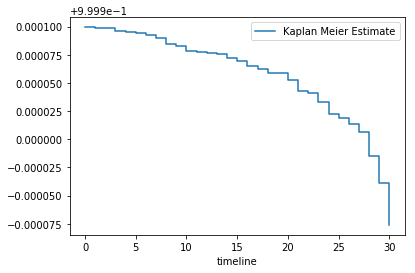

In [16]:
## Creation d'un estimateur
kmf.plot(ci_show=False)

In [17]:
kmf.median_

inf

### 5 - Estimateur Nelson-Aalen

In [16]:
df_2 = data[['date','end','failure','model']]

In [18]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

In [ ]:
naf.fit(T,event_observed=E)

In [20]:
print(naf.cumulative_hazard_.head())

           NA_estimate
timeline              
0.0       6.033243e-07
1.0       9.149601e-07
2.0       1.559556e-06
3.0       3.562341e-06
4.0       4.946933e-06


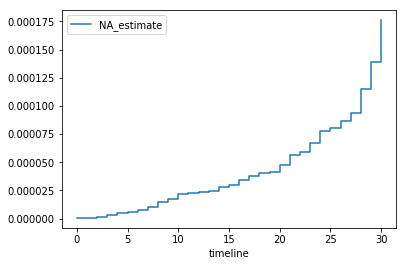

In [21]:
naf.plot()